# Исследование надежности заемщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** — проверить гипотезу:
 * H1.Cемейное положение и количество детей клиента **влияет** на факт погашения кредита в срок
 
**Ход исследования**
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотезы.

### Шаг 1. Обзор данных

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Датасет состоит из 12 колонок и 21525 строк.

### Шаг 2.1 Заполнение пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Количество пропусков в days_employed: 2174


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Количество пропусков в total_income: 2174


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


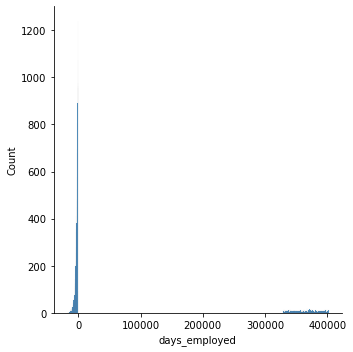

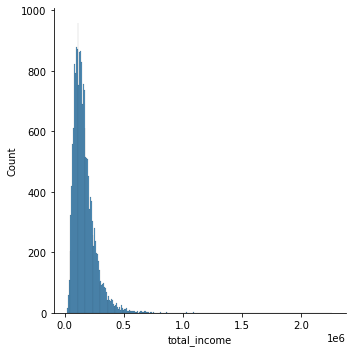

In [2]:
# подсчёт пропусков
display(df.isna().sum())

import seaborn as sns

print('Количество пропусков в days_employed:', len(df[df['days_employed'].isna()]))
display(df[df['days_employed'].isna()].head())
sns_plot = sns.displot(df['days_employed'])

print('Количество пропусков в total_income:', len(df[df['total_income'].isna()]))
display(df[df['total_income'].isna()].head())
sns_plot = sns.displot(df['total_income'])

Обнаружены пропуски в колонках `days_employed` и `total_income`, это количественные данные, они
не влияют на результаты проверки гипотезы, указанной в задаче, но могут пригодиться для решения задачи "вокруг". Однако, простое удаление этих строк может лишить важной порции данных. Вероятно, пропуски связаны с тем, что эти данные исходно не указаны для гос.служащих и пенсионеров. Пропущенные `days_employed` будут заменены на следующем этапе, `total_income` заполним медианным значением, т.к. разброс данных в этой колонке большой и распределение значений не является нормальным.         

Доля пропущенных значений:
* в столбце `days_employed` : 2174 / 21525 * 100% = 10%
* в столбце `total_income` : 2174 / 21525 * 100% = 10%

In [3]:
#заполнение медианой выборки с заполненными значениями total_income и проверка
median_value = df[~(df['total_income'].isna())]['total_income'].median()   
df['total_income'] = df['total_income'].fillna(median_value)
display(df.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [4]:
#количество дней трудового стажа меньше 0 или больше возраста
df_anomaly = df[(df['days_employed'] < 0) | (df['days_employed'] > df['dob_years']*356)]
display('Количество дней трудового стажа меньше 0 или больше возраста:', len(df_anomaly))

#доход меньше 0 или больше 10 000 0000
df_anomaly = df[(df['total_income'] < 0) | (df['total_income'] > 100000000) ]
display('Доход меньше 0 или больше 10 000 0000:', len(df_anomaly))

#возраст меньше 0 или больше 100
df_anomaly = df[(df['dob_years'] < 0) | (df['dob_years'] > 100)]
display('Возраст меньше 0 или больше 100:', len(df_anomaly))

df.head()
#уникальные записи в остальных колонках
def print_unique(col_name):
    display(col_name)
    display(sorted(df[col_name].unique()))

print_unique('children')
print_unique('education')
print_unique('education_id')
print_unique('family_status')
print_unique('family_status_id')
print_unique('gender')
print_unique('income_type')
print_unique('debt')
print_unique('purpose')

'Количество дней трудового стажа меньше 0 или больше возраста:'

19351

'Доход меньше 0 или больше 10 000 0000:'

0

'Возраст меньше 0 или больше 100:'

0

'children'

[-1, 0, 1, 2, 3, 4, 5, 20]

'education'

['ВЫСШЕЕ',
 'Высшее',
 'НАЧАЛЬНОЕ',
 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
 'Начальное',
 'Неоконченное высшее',
 'СРЕДНЕЕ',
 'Среднее',
 'УЧЕНАЯ СТЕПЕНЬ',
 'Ученая степень',
 'высшее',
 'начальное',
 'неоконченное высшее',
 'среднее',
 'ученая степень']

'education_id'

[0, 1, 2, 3, 4]

'family_status'

['Не женат / не замужем',
 'в разводе',
 'вдовец / вдова',
 'гражданский брак',
 'женат / замужем']

'family_status_id'

[0, 1, 2, 3, 4]

'gender'

['F', 'M', 'XNA']

'income_type'

['безработный',
 'в декрете',
 'госслужащий',
 'компаньон',
 'пенсионер',
 'предприниматель',
 'сотрудник',
 'студент']

'debt'

[0, 1]

'purpose'

['автомобили',
 'автомобиль',
 'высшее образование',
 'дополнительное образование',
 'жилье',
 'заняться высшим образованием',
 'заняться образованием',
 'на покупку автомобиля',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'на проведение свадьбы',
 'недвижимость',
 'образование',
 'операции с жильем',
 'операции с коммерческой недвижимостью',
 'операции с недвижимостью',
 'операции со своей недвижимостью',
 'покупка жилой недвижимости',
 'покупка жилья',
 'покупка жилья для сдачи',
 'покупка жилья для семьи',
 'покупка коммерческой недвижимости',
 'покупка недвижимости',
 'покупка своего жилья',
 'получение высшего образования',
 'получение дополнительного образования',
 'получение образования',
 'приобретение автомобиля',
 'профильное образование',
 'ремонт жилью',
 'свадьба',
 'свой автомобиль',
 'сделка с автомобилем',
 'сделка с подержанным автомобилем',
 'строительство жилой недвижимости',
 'строительство недвижимости',
 'строительство собственной недв

Аномалии встречаются в колонках `days_employed` , `children` , `gender`. Явные дубли в колонке , неявные дубли в колонке `purpose`. В колонках `family_status` и `education` нужно привести все значения к нижнему регистру.

Судя по количеству строк с аномальными значениями в `days_employed` 19351 и строк с пустыми значениями в этой колонке 2174 все строки данной колонки являются некорректными. Однако ни для проверки основной гипотезы, ни для ответов на дальнейшие вопросы количество дней трудового стажа не нужно. Поэтому, удалим эту колонку из датасета. Колонку `gender` также можно удалить по этой причине.

Отрицательные значения в `children` заменим на 0, число детей 20 кажется ошибочным, лучше эти строки удалить.

In [5]:
len(df[df['children'] == -1])

47

In [6]:
#Обработка аномалий

df = df.drop(columns=['days_employed', 'gender'])
df.loc[df['children'] < 0, 'children'] = 0
df = df.drop(df[df['children'] == 20].index)
display(df)


,children,dob_years,education,education_id,family_status,family_status_id,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...
21520,1,43,среднее,1,гражданский брак,1,компаньон,0,224791.862382,операции с жильем
21521,0,67,среднее,1,женат / замужем,0,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,38,среднее,1,гражданский брак,1,сотрудник,1,89672.561153,недвижимость
21523,3,38,среднее,1,женат / замужем,0,сотрудник,1,244093.050500,на покупку своего автомобиля


### Шаг 2.3. Изменение типов данных.

In [7]:
df['total_income'] = df['total_income'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21449 entries, 0 to 21524
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21449 non-null  int64 
 1   dob_years         21449 non-null  int64 
 2   education         21449 non-null  object
 3   education_id      21449 non-null  int64 
 4   family_status     21449 non-null  object
 5   family_status_id  21449 non-null  int64 
 6   income_type       21449 non-null  object
 7   debt              21449 non-null  int64 
 8   total_income      21449 non-null  int32 
 9   purpose           21449 non-null  object
dtypes: int32(1), int64(5), object(4)
memory usage: 1.7+ MB


### Шаг 2.4. Удаление дубликатов.
Явные дубликаты могли возникнуть по техническим причинам, неявные - из-за человеческого фактора.
Перед удалением дубликатов колонки `education` `family_status` приведем к нижему регистру.

In [8]:
# Устранение неявных дубликатов
df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()

wrong_values = ['автомобили', 
                'свой автомобиль', 
                'сделка с автомобилем', 
                'на покупку подержанного автомобиля',
                'на покупку своего автомобиля',
                'на покупку автомобиля',
                'приобретение автомобиля',
                'сделка с подержанным автомобилем']
df['purpose'] = df['purpose'].replace(wrong_values, 'автомобиль')
wrong_values  = ['высшее образование',
                 'дополнительное образование',
                 'заняться высшим образованием',
                 'заняться образованием',
                 'получение высшего образования',
                 'получение дополнительного образования',
                 'получение образования',
                 'профильное образование'
                ]
df['purpose'] = df['purpose'].replace(wrong_values, 'образование')

wrong_values  = ['жилье',
                'операции с жильем',
                'операции с коммерческой недвижимостью',
                'операции с недвижимостью',
                'операции со своей недвижимостью',
                'покупка жилой недвижимости',
                'покупка жилья',
                'покупка жилья для сдачи',
                'покупка жилья для семьи',
                'покупка коммерческой недвижимости',
                'покупка недвижимости',
                'покупка своего жилья',
                'ремонт жилью',
                'сделка с подержанным автомобилем',
                'строительство жилой недвижимости',
                'строительство недвижимости',
                'строительство собственной недвижимости'
                ]
df['purpose'] = df['purpose'].replace(wrong_values, 'недвижимость')

wrong_values  = ['на проведение свадьбы',
                 'сыграть свадьбу'
                ]
df['purpose'] = df['purpose'].replace(wrong_values, 'свадьба')
display(df['purpose'].sort_values().unique())

# удаление явных дубликатов (с удалением старых индексов и формированием новых)
display(df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
display(df.duplicated().sum())

array(['автомобиль', 'недвижимость', 'образование', 'свадьба'],
      dtype=object)

575

0

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим словари для education и family_status

In [9]:
education_dict = df[['education_id', 'education']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
display(education_dict.head()) 

family_status_dict = df[['family_status_id', 'family_status']]
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)
display(family_status_dict.head()) 

df = df.drop(columns=['education', 'family_status'])
display(df.head()) 

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


,children,dob_years,education_id,family_status_id,income_type,debt,total_income,purpose
0,1,42,0,0,сотрудник,0,253875,недвижимость
1,1,36,1,0,сотрудник,0,112080,автомобиль
2,0,33,1,0,сотрудник,0,145885,недвижимость
3,3,32,1,0,сотрудник,0,267628,образование
4,0,53,1,1,пенсионер,0,158616,свадьба


### Шаг 2.6. Категоризация дохода.

In [10]:
def income_group(income):
    if income <= 30000:
        return 'E'
    elif income <= 50000:
        return 'D'
    elif income <= 200000:
        return 'C'
    elif income <= 1000000:
        return 'B'
    else:
        return 'A'

df['total_income_category'] = df['total_income'].apply(income_group)
display(df.head()) 

,children,dob_years,education_id,family_status_id,income_type,debt,total_income,purpose,total_income_category
0,1,42,0,0,сотрудник,0,253875,недвижимость,B
1,1,36,1,0,сотрудник,0,112080,автомобиль,C
2,0,33,1,0,сотрудник,0,145885,недвижимость,C
3,3,32,1,0,сотрудник,0,267628,образование,B
4,0,53,1,1,пенсионер,0,158616,свадьба,C


### Шаг 2.7. Категоризация целей кредита.
Избыточно, т.к. цели кредита нормализованы на этапе устранения дубликатов

### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

,sum,count,return_rate
children,,,
5,0,9,0.000000
0,1059,13754,7.699578
3,27,328,8.231707
1,442,4720,9.364407
2,194,2023,9.589718
4,4,40,10.000000


,children,dob_years,education_id,family_status_id,debt,total_income
children,1.000000,-0.307780,-0.026213,-0.160444,0.023945,0.029071
dob_years,-0.307780,1.000000,0.065046,-0.067036,-0.068944,-0.050053
education_id,-0.026213,0.065046,1.000000,0.010111,0.053493,-0.169829
family_status_id,-0.160444,-0.067036,0.010111,1.000000,0.018113,-0.009954
debt,0.023945,-0.068944,0.053493,0.018113,1.000000,-0.013070
total_income,0.029071,-0.050053,-0.169829,-0.009954,-0.013070,1.000000


<AxesSubplot:>

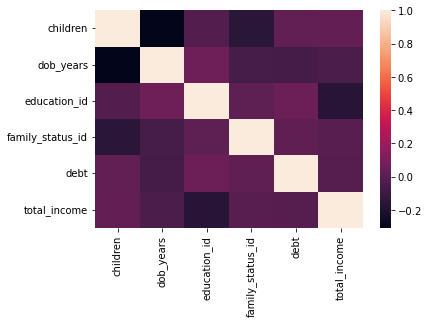

In [11]:
#вычисляем процент возврата кредита
df_grouped = df.groupby('children').debt.agg(['sum', 'count'])
df_grouped['return_rate'] = df_grouped['sum'] / df_grouped['count'] * 100
display(df_grouped.sort_values('return_rate')) 

#проверим корреляцию
display(df.corr())
import seaborn as sns
sns.heatmap(df.corr())

##### Вывод 1:
Минимальный процент возврата кредита у заемщиков с числом детей 5, максимальный - с четырьмя детьми 
Однако коэффициент корреляции между этими величинами 0.023945. Это вызвано тем, что в датасете всего 9 строк, где количество детей - 5. Следовательно статистическую значимость этой зависимости подтвердить на текущих данных нельзя. 

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [12]:
#вычисляем процент возврата кредита
df_grouped = df.groupby('family_status_id').debt.agg(['sum', 'count'])
df_grouped['return_rate'] = df_grouped['sum'] / df_grouped['count'] * 100

#склеиваем со словарем
family_status_grouped = family_status_dict.merge(df_grouped, on='family_status_id', how='right')
display(family_status_grouped.sort_values('return_rate'))

#через сводную таблицу
df.pivot_table(index='family_status_id',values='debt',aggfunc=['sum', 'count'])

,family_status_id,family_status,sum,count,return_rate
2,2,вдовец / вдова,63,938,6.716418
3,3,в разводе,84,1190,7.058824
0,0,женат / замужем,923,11897,7.758258
1,1,гражданский брак,384,4088,9.393346
4,4,не женат / не замужем,272,2761,9.851503


,sum,count
,debt,debt
family_status_id,,
0,923,11897
1,384,4088
2,63,938
3,84,1190
4,272,2761


##### Вывод 2:
Минимальный процент возврата кредита у заемщиков с семейным статусом "вдовец / вдова" , максимальный - "не женат / не замужем.
Однако коэффициент корреляции между этими величинами 0.018113. Это вызвано тем, что в датасете меньше всего строк с семейным положением "с семейным статусом "вдовец / вдова". Следовательно статистическую значимость этой зависимости подтвердить на текущих данных нельзя. 

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [13]:
#вычисляем процент возврата кредита
df_grouped = df.groupby('total_income_category').debt.agg(['sum', 'count'])
df_grouped['return_rate'] = df_grouped['sum'] / df_grouped['count'] * 100
display(df_grouped.sort_values('return_rate')) 

,sum,count,return_rate
total_income_category,,,
D,21,350,6.000000
B,354,5020,7.051793
A,2,25,8.000000
C,1347,15457,8.714498
E,2,22,9.090909


##### Вывод 3:
Минимальный процент возврата кредита у заемщиков с категорией дохода "D" (30001–50000), максимальный - с категорией "E" (0–30000). Категории "D" и "E" близкие между собой, категория "А" с минимальным доходам имеет средний процент возврата. Можно сделать вывод, что уровень дохода совсем не влияет на факт погашения кредита в срок.
Коэффициент корреляции между этими величинами -0.013070. Это вызвано тем, что в датасете всего 250 строк с категорией дохода "D" и 22 строки с категорией "E". Следовательно статистическую значимость этой зависимости подтвердить на текущих данных нельзя.  

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

In [14]:
#вычисляем процент возврата кредита
df_grouped = df.groupby('purpose').debt.agg(['sum', 'count'])
df_grouped['return_rate'] = df_grouped['sum'] / df_grouped['count'] * 100
display(df_grouped.sort_values('return_rate'))

,sum,count,return_rate
purpose,,,
недвижимость,776,10442,7.431527
свадьба,182,2280,7.982456
образование,369,3922,9.408465
автомобиль,399,4230,9.432624


##### Вывод 4:
Минимальный процент возврата кредита, который брался на сделку с недвижимостью, максимальный - на сделку с автомобилем.

## Общий вывод:

По данным статистики о платёжеспособности клиентов проведено исследование, как различные факторы влияют на факт погашения кредита в срок. Проверили 4 гипотезы и установили следующее:

1. На процент возврата кредита влияет количество детей заемщика
2. На процент возврата кредита влияет семейное положение заемщика
3. На процент возврата кредита не влияет уровень дохода заемщика
4. На процент возврата кредита влияет цель, с которой занимаются средства

Статистическую достоверность проверки данных гипотез установить невозможно. С методами проверок гипотез мы ещё познакомимся в следующих темах.